# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Carter Stancil 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                 Version
----------------------- -----------
annotated-types         0.7.0
asttokens               3.0.0
beautifulsoup4          4.13.4
blis                    1.3.0
catalogue               2.0.10
certifi                 2025.8.3
charset-normalizer      3.4.2
click                   8.2.1
cloudpathlib            0.21.1
colorama                0.4.6
comm                    0.2.3
confection              0.1.5
contourpy               1.3.3
cycler                  0.12.1
cymem                   2.0.11
debugpy                 1.8.15
decorator               5.2.1
executing               2.2.0
fonttools               4.59.0
html5lib                1.1
idna                    3.10
ipykernel               6.30.1
ipython                 9.4.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
Jinja2                  3.1.6
joblib                  1.5.1
jupyter_client          8.6.3
jupyter_core            5.8.1
kiwisolver              1.4.8
langcodes              

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle


url = "https://www.forbes.com/sites/donyaeger/2025/03/04/the-greatness-of-steph-curry-a-leadership-lesson-worth-watching/"


response = requests.get(url)
response.raise_for_status()  


soup = BeautifulSoup(response.text, 'html.parser')

article = soup.find("article") 

article_html = str(article)

with open("steph_curry_article.pkl", "wb") as f:
    pickle.dump(article_html, f)

print("Article HTML saved to steph_curry_article.pkl")

Article HTML saved to steph_curry_article.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [10]:
import spacy
from collections import Counter
from textblob import TextBlob

with open("steph_curry_article.pkl", "rb") as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, "html.parser")

article_text = soup.get_text(separator="\n", strip=True)

blob = TextBlob(article_text)

polarity = blob.sentiment.polarity

print(f"Polarity Score {polarity}")

nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)

num_sentences = len(list(doc.sents))

print(f"Number of sentences: {num_sentences}")


Polarity Score 0.19161155511155512
Number of sentences: 51


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [11]:
with open("steph_curry_article.pkl", "rb") as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, "html.parser")

article_text = soup.get_text(separator="\n", strip=True)


nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)

exclude_words = ["getty", "images", "user", "warriors", "kerr", "curry"]

tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.text.lower () not in exclude_words
]

token_freq = Counter(tokens)

most_common = token_freq.most_common(5)

print("Top 5 Most Frequent Tokens (lowercased, excluding stopwords/punctuation):")
for token, freq in most_common:
    print(f"Token: '{token}' — Frequency: {freq}")

Top 5 Most Frequent Tokens (lowercased, excluding stopwords/punctuation):
Token: 'greatness' — Frequency: 7
Token: 'leadership' — Frequency: 5
Token: 'lesson' — Frequency: 4
Token: 'watching' — Frequency: 4
Token: 'business' — Frequency: 4


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [15]:
with open("steph_curry_article.pkl", "rb") as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, "html.parser")

article_text = soup.get_text(separator="\n", strip=True)

nlp = spacy.load("en_core_web_sm")


doc = nlp(article_text)

exclude_lemmas = ["curry", "getty", "images", "warriors", "kerr", "user"]

lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space and token.lemma_.lower() not in exclude_lemmas
]

lemma_freq = Counter(lemmas)

most_common_lemmas = lemma_freq.most_common(5)


print("Top 5 Most Frequent Lemmas (lowercased, excluding stopwords/punctuation):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' — Frequency: {freq}")

Top 5 Most Frequent Lemmas (lowercased, excluding stopwords/punctuation):
Lemma: 'greatness' — Frequency: 7
Lemma: 'leadership' — Frequency: 5
Lemma: 'lesson' — Frequency: 5
Lemma: 'watch' — Frequency: 4
Lemma: 'study' — Frequency: 4


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Score by token: 0.02


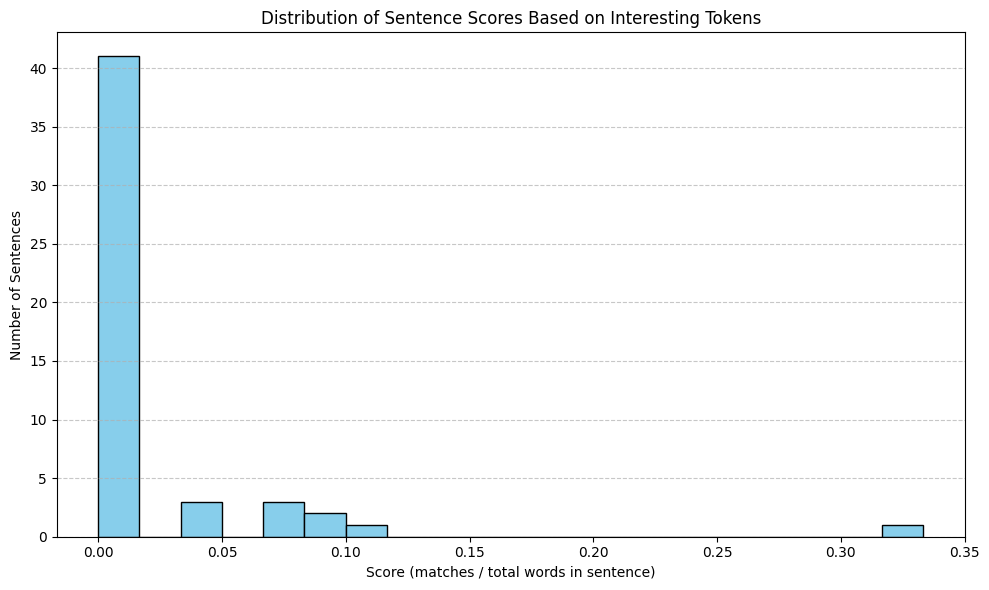

In [18]:
import matplotlib.pyplot as plt

def score_sentence_by_token(sentence, interesting_tokens):
  
    
    words = sentence.split()
    if not words:
        return 0.0

    
    words_lower = [word.lower() for word in words]
    interesting_set = set(interesting_tokens)

    
    match_count = sum(1 for word in words_lower if word in interesting_set)

    return match_count / len(words)

with open("steph_curry_article.pkl", "rb") as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, "html.parser")

article_text = soup.get_text(separator="\n", strip=True)
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
sentences = [sent.text for sent in doc.sents]

interesting_tokens = ["greatness", "leadership", "lesson", "watching", "business"]

score = score_sentence_by_token(article_text, interesting_tokens)
print(f"Score by token: {score:.2f}")

scores = [score_sentence_by_token(sent, interesting_tokens) for sent in sentences]


plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Sentence Scores Based on Interesting Tokens")
plt.xlabel("Score (matches / total words in sentence)")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Score by lemmas: 0.03


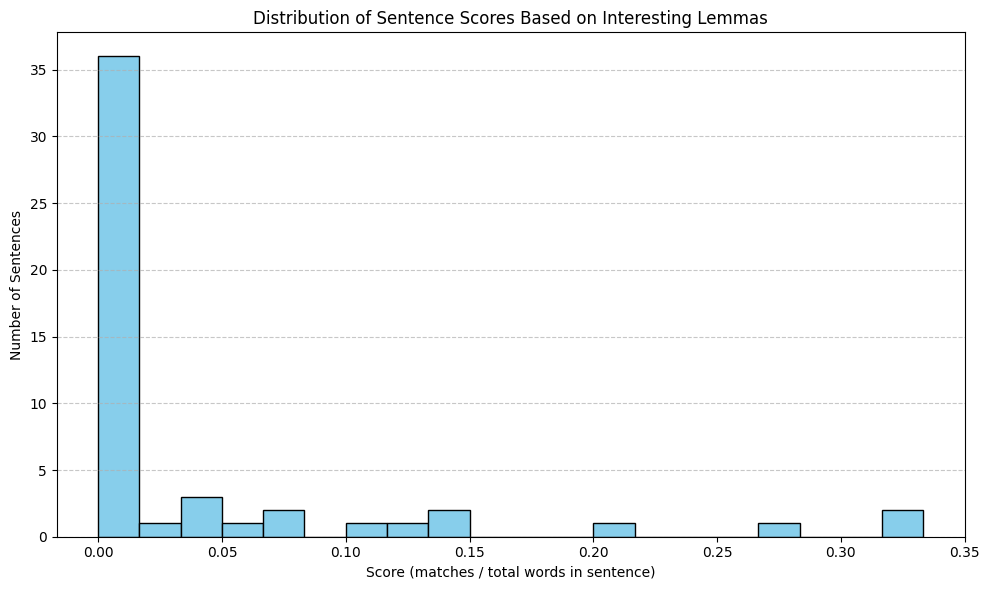

In [20]:
def score_sentence_by_lemmas(sentence, interesting_lemmas):
   
    doc = nlp(sentence)
    lemmas_in_sentence = [
        token.lemma_.lower()
        for token in doc
        if not token.is_punct and not token.is_space
    ]

    if not lemmas_in_sentence:
        return 0.0

    interesting_set = set(interesting_lemmas)
    match_count = sum(1 for lemma in lemmas_in_sentence if lemma in interesting_set)

    return match_count / len(lemmas_in_sentence)

with open("steph_curry_article.pkl", "rb") as f:
    article_html = pickle.load(f)

soup = BeautifulSoup(article_html, "html.parser")

article_text = soup.get_text(separator="\n", strip=True)
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
sentences = [sent.text for sent in doc.sents]

interesting_lemmas = ["greatness", "leadership", "lesson", "watch", "study"]

score_lemmas = score_sentence_by_lemmas(article_text, interesting_lemmas)
print(f"Score by lemmas: {score_lemmas:.2f}")

scores = [score_sentence_by_lemmas(sent, interesting_lemmas) for sent in sentences]


plt.figure(figsize=(10, 6))
plt.hist(scores, bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Sentence Scores Based on Interesting Lemmas")
plt.xlabel("Score (matches / total words in sentence)")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

I am going to use the average sentence score as the cutoff

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [63]:
from statistics import mean

with open("steph_curry_article.pkl", "rb") as f:
    article_html = pickle.load(f)



soup = BeautifulSoup(article_html, "html.parser")

for tag in soup.find_all(['img', 'figure', 'figcaption']):
    tag.decompose()  

for tag in soup.find_all(class_=['image', 'image-caption', 'media']):
    tag.decompose()

article_text = soup.get_text(separator="\n", strip=True)

nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)

exclude_words = ["getty", "images", "user", "warriors", "kerr", "curry"]

sentence_scores = []
for sent in doc.sents:
    score = sum(1 for token in sent if token.is_alpha and token.text.lower() not in exclude_words and not token.is_stop)
    sentence_scores.append((sent.text.strip(), score))
scores = [score for _, score in sentence_scores]
cutoff = 4.

summary = [text for text, score in sentence_scores if score < cutoff]

print("Summary:")
for s in summary:
    print("".join(s))

Summary:
Why?
You appreciate it.
We grow tired of greatness.
He’s an incredible performer, and he put on quite a show tonight.”
For the first time since 2019…he dunked!
“I’m calling it right now.
That was the last one you’re going to see.”
He’s still evolving.
So here’s the question for leaders: are you watching?
Are you studying?
Because one day, Curry will take his final shot.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [57]:
summary_text = "Why? You appreciate it. We grow tired of greatness. He’s an incredible performer, and he put on quite a show tonight. For the first time since 2019…he dunked! I’m calling it right now. That was the last one you’re going to see. He’s still evolving. So here’s the question for leaders: are you watching? Are you studying? Because one day, Curry will take his final shot."

blob = TextBlob(summary_text)

polarity = blob.sentiment.polarity

print(f"Polarity Score {polarity}")

doc = nlp(summary_text)

num_sentences = len(list(doc.sents))

print(f"Number of sentences: {num_sentences}")

Polarity Score 0.18303571428571427
Number of sentences: 11


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [65]:
from statistics import mean

with open("steph_curry_article.pkl", "rb") as f:
    article_html = pickle.load(f)



soup = BeautifulSoup(article_html, "html.parser")

for tag in soup.find_all(['img', 'figure', 'figcaption']):
    tag.decompose()  

for tag in soup.find_all(class_=['image', 'image-caption', 'media']):
    tag.decompose()

article_text = soup.get_text(separator="\n", strip=True)

nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)

interesting_lemmas = ["greatness", "leadership", "lesson", "watch", "study"]

sentence_scores = []
for sent in doc.sents:
    score = sum(1 for token in sent if token.is_alpha and token.lemma_.lower() not in exclude_lemmas and not token.is_stop)
    sentence_scores.append((sent.text.strip(), score))
scores = [score for _, score in sentence_scores]
cutoff = 4

summary = [text for text, score in sentence_scores if score < cutoff]

print("Summary:")
for s in summary:
    print("".join(s))

Summary:
Why?
You appreciate it.
We grow tired of greatness.
He’s an incredible performer, and he put on quite a show tonight.”
For the first time since 2019…he dunked!
“I’m calling it right now.
That was the last one you’re going to see.”
He’s still evolving.
So here’s the question for leaders: are you watching?
Are you studying?
Because one day, Curry will take his final shot.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [66]:
summary_text = "Why? You appreciate it. We grow tired of greatness. He’s an incredible performer, and he put on quite a show tonight. For the first time since 2019…he dunked! I’m calling it right now. That was the last one you’re going to see. He’s still evolving. So here’s the question for leaders: are you watching? Are you studying? Because one day, Curry will take his final shot."

blob = TextBlob(summary_text)

polarity = blob.sentiment.polarity

print(f"Polarity Score {polarity}")

doc = nlp(summary_text)

num_sentences = len(list(doc.sents))

print(f"Number of sentences: {num_sentences}")

Polarity Score 0.18303571428571427
Number of sentences: 11


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

There is no difference between the two summaries and scores. This may be due to the excluded tokens and lemmas I defined earlier. 

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Both of my summaries were the same, which ended up including both of the similar tokens/lemmas. If I did not exclude multiple words, there might be a slight difference. But this article is ultimately applauding Steph Curry for what hes done for the game an his legacy